In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import easygui

In [22]:

print("Select DataSet: ")
# save filepath to variable for easier access
ds = easygui.fileopenbox()
# read the data and store data in DataFrame titled ili_data
data = pd.read_csv(ds, parse_dates = ["weekending"])
# print a summary of the data in Inflenza like illness data
data.describe()

Select DataSet: 


,date_code,Number_Positive,Specimens_Tested,Percent_Positive
count,36179.000000,36179.000000,36179.000000,30345.000000
mean,201545.854474,19.956494,330.530639,4.132762
std,222.276131,88.423983,583.692758,7.261318
min,200940.000000,0.000000,0.000000,0.000000
25%,201422.000000,0.000000,36.000000,0.000000
50%,201607.000000,1.000000,128.000000,0.870000
75%,201723.000000,7.000000,357.000000,4.880000
max,201839.000000,3125.000000,8046.000000,100.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36179 entries, 0 to 36178
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   season             36179 non-null  object        
 1   date_code          36179 non-null  int64         
 2   weekending         36179 non-null  datetime64[ns]
 3   region             36179 non-null  object        
 4   Respiratory_Virus  36179 non-null  object        
 5   Number_Positive    36179 non-null  int64         
 6   Specimens_Tested   36179 non-null  int64         
 7   Percent_Positive   30345 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 2.2+ MB


In [5]:
data['Respiratory_Virus'].unique()

array(['Influenza_A', 'Influenza_B', 'Total_Influenza', 'RSV',
       'Adenovirus', 'Enterovirus_Rhinovirus', 'HMPV', 'Parainfluenza_1',
       'Parainfluenza_2', 'Parainfluenza_3', 'Parainfluenza_4',
       'Parainfluenza_UnknownType', 'Total_Parainfluenza',
       'Coronavirus_HKU1', 'Coronavirus_NL63', 'Coronavirus_OC43',
       'Coronavirus_229E', 'Coronavirus_UnknownType', 'Total_Coronavirus'],
      dtype=object)

In [24]:
influA = data.loc[data['Respiratory_Virus'] == 'Influenza_A']
influB = data.loc[data['Respiratory_Virus'] == 'Influenza_B']
totalinflu = data.loc[data['Respiratory_Virus'] == 'Total_Influenza']
influRSV = data.loc[data['Respiratory_Virus'] == 'RSV']
influAdeno = data.loc[data['Respiratory_Virus'] == 'Adenovirus']
influRhino = data.loc[data['Respiratory_Virus'] == 'Enterovirus_Rhinovirus']
influHMPV = data.loc[data['Respiratory_Virus'] == 'HMPV']
influPara1 = data.loc[data['Respiratory_Virus'] == 'Parainfluenza_1']
influPara2 = data.loc[data['Respiratory_Virus'] == 'Parainfluenza_2']
influPara3 = data.loc[data['Respiratory_Virus'] == 'Parainfluenza_3']
influPara4 = data.loc[data['Respiratory_Virus'] == 'Parainfluenza_4']
influTotalPara = data.loc[data['Respiratory_Virus'] == 'Total_Parainfluenza']
influParaUnknown = data.loc[data['Respiratory_Virus'] == 'Parainfluenza_UnknownType']
influCoronaHK = data.loc[data['Respiratory_Virus'] == 'Coronavirus_HKU1']
influCoronaNL = data.loc[data['Respiratory_Virus'] == 'Coronavirus_NL63']
influCoronaOC = data.loc[data['Respiratory_Virus'] == 'Coronavirus_OC43']
influCorona22 = data.loc[data['Respiratory_Virus'] == 'Coronavirus_229E']
influCornoaUnknown = data.loc[data['Respiratory_Virus'] == 'Coronavirus_UnknownType']
influTotalCorona = data.loc[data['Respiratory_Virus'] == 'Total_Coronavirus']

In [25]:
influA['weekending'].min(), influA['weekending'].max()
influB['weekending'].min(), influB['weekending'].max()
totalinflu['weekending'].min(), totalinflu['weekending'].max()
influRSV['weekending'].min(), influRSV['weekending'].max()
influAdeno['weekending'].min(), influAdeno['weekending'].max()
influRhino['weekending'].min(), influRhino['weekending'].max()
influHMPV['weekending'].min(), influHMPV['weekending'].max()
influPara1['weekending'].min(), influPara1['weekending'].max()
influPara2['weekending'].min(), influPara2['weekending'].max()
influPara3['weekending'].min(), influPara3['weekending'].max()
influPara4['weekending'].min(), influPara4['weekending'].max()
influTotalPara['weekending'].min(), influTotalPara['weekending'].max()
influParaUnknown['weekending'].min(), influParaUnknown['weekending'].max()
influCoronaHK['weekending'].min(), influCoronaHK['weekending'].max()
influCoronaNL['weekending'].min(), influCoronaNL['weekending'].max()
influCoronaOC['weekending'].min(), influCoronaOC['weekending'].max()
influCorona22['weekending'].min(), influCorona22['weekending'].max()
influCornoaUnknown['weekending'].min(), influCornoaUnknown['weekending'].max()
influTotalCorona['weekending'].min(), influTotalCorona['weekending'].max()

(Timestamp('2015-10-10 00:00:00'), Timestamp('2018-09-29 00:00:00'))

In [26]:
data.columns
pd.to_datetime(data['weekending'])
pd.to_datetime(influA['weekending'])

0       2009-10-10
4       2009-10-10
8       2009-10-10
12      2009-10-10
16      2009-10-10
           ...    
36084   2018-09-29
36103   2018-09-29
36122   2018-09-29
36141   2018-09-29
36160   2018-09-29
Name: weekending, Length: 3296, dtype: datetime64[ns]

In [27]:
influA = influA.groupby('weekending')['Number_Positive'].sum().reset_index()

In [28]:
influA = influA.set_index('weekending')
influA.index
print(influA.index)

DatetimeIndex(['2009-10-10', '2009-10-17', '2009-10-24', '2009-10-31',
               '2009-11-07', '2009-11-14', '2009-11-21', '2009-11-28',
               '2009-12-05', '2009-12-12',
               ...
               '2018-07-28', '2018-08-04', '2018-08-11', '2018-08-18',
               '2018-08-25', '2018-09-01', '2018-09-08', '2018-09-15',
               '2018-09-22', '2018-09-29'],
              dtype='datetime64[ns]', name='weekending', length=469, freq=None)


In [29]:
y = influA['Number_Positive'].resample('MS').mean()

In [30]:
y['2017':]

weekending
2017-01-01    3095.5
2017-02-01    1783.5
2017-03-01     545.5
2017-04-01     132.8
2017-05-01      24.0
2017-06-01      14.0
2017-07-01      15.2
2017-08-01      11.5
2017-09-01      39.2
2017-10-01     137.5
2017-11-01     344.5
2017-12-01    2245.2
2018-01-01    3025.5
2018-02-01    1018.5
2018-03-01     590.0
2018-04-01      90.0
2018-05-01      19.0
2018-06-01       2.8
2018-07-01       8.5
2018-08-01       8.0
2018-09-01      12.4
Freq: MS, Name: Number_Positive, dtype: float64

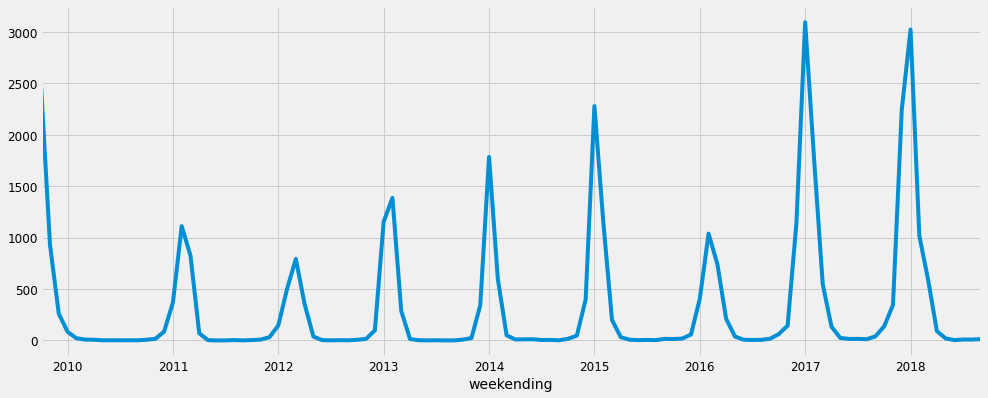

In [31]:
y.plot(figsize=(15, 6))
plt.show()

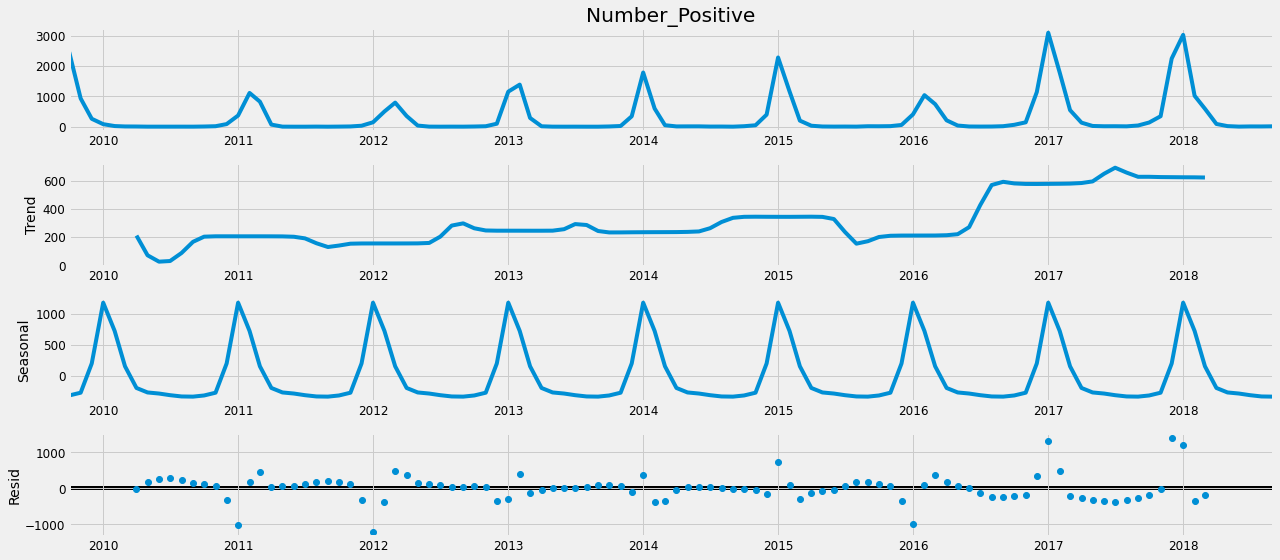

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [33]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [36]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1702.0283665692784
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1484.3711621699467
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1445.4707489471373
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1251.144108561261
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1476.445557691573
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1426.3417730973727
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1268.6323074230913
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1252.4983063489046
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1620.7497396416252
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1423.072856585729
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1403.9804141392758
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1215.1296502874782
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1441.1174314811983
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1386.723266678067
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1249.280647921054
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1216.924072378029
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1641.8421301261194
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1448.306250257136

In [37]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3902      0.113      3.445      0.001       0.168       0.612
ma.L1         -0.9778      0.063    -15.512      0.000      -1.101      -0.854
ar.S.L12      -0.3566      0.063     -5.657      0.000      -0.480      -0.233
sigma2      1.794e+05   1.67e+04     10.718      0.000    1.47e+05    2.12e+05


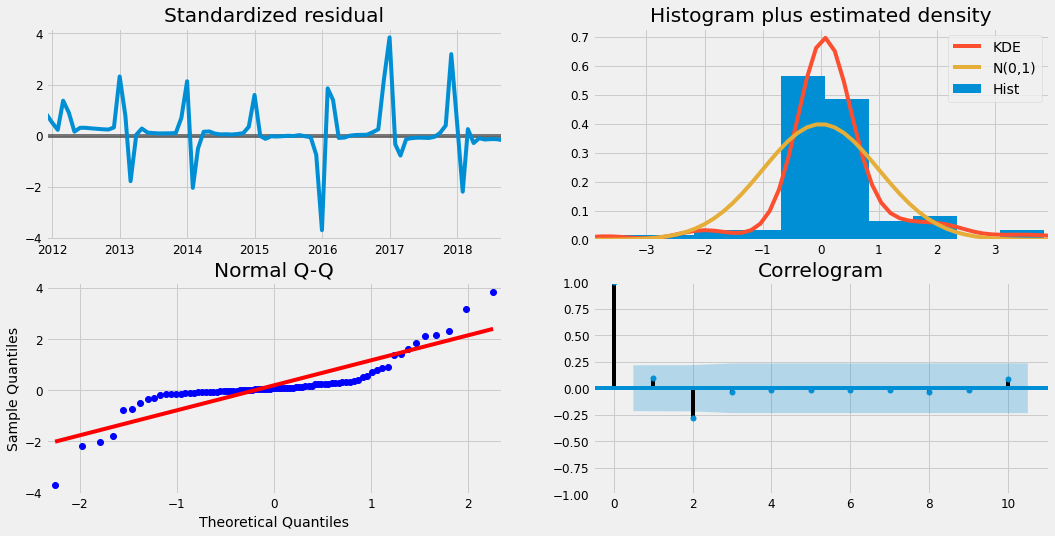

In [38]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

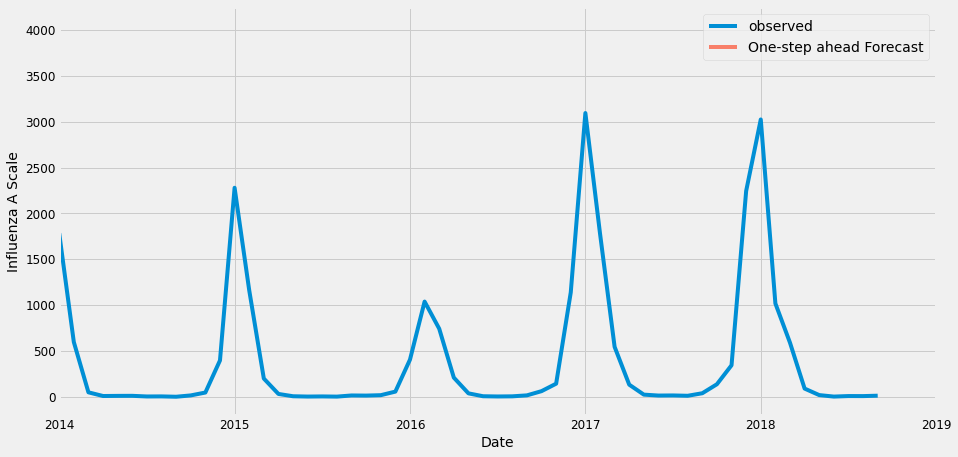

In [40]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Influenza A Scale')
plt.legend()
plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is nan


In [43]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is nan


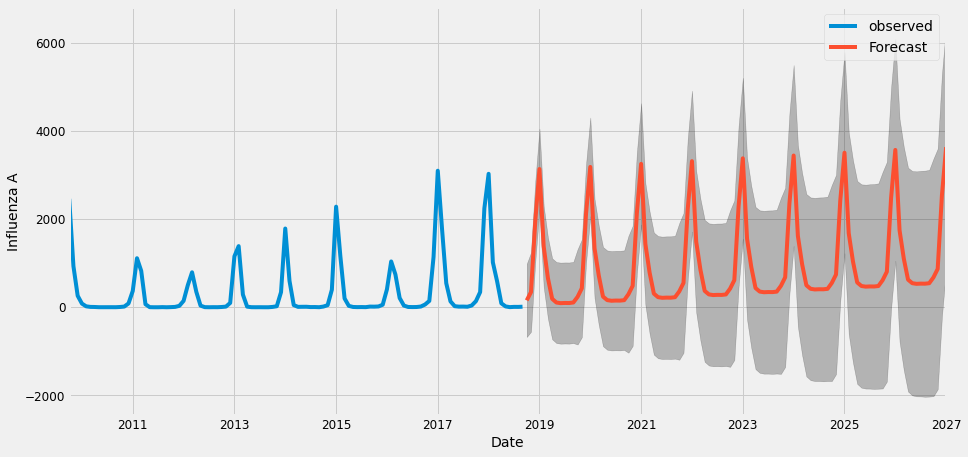

In [45]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Influenza A')
plt.legend()
plt.show()